In [109]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import shutil, os
import torch

In [63]:
from skimage.io import imread                    # Importing libraries
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np

(512, 640, 3)


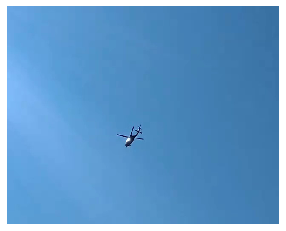

In [100]:
from skimage.io import imread                    # Importing libraries
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
                                                    # reading the image
img = imread('/home/cs18s504/Downloads/drone_hog/00000001.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

In [65]:
512*640

327680

In [66]:
fd, hog_image = hog(img, orientations=1, pixels_per_cell=(4, 4),cells_per_block=(1, 1), visualize=True, multichannel=True, feature_vector=False)

In [67]:
fd.shape

(128, 160, 1, 1, 1)

In [68]:
c=np.zeros((128,160))
for i in range(0,128):
    for j in range(0,160):
        c[i,j]=(fd[i,j,0,0,0])

(128, 160)


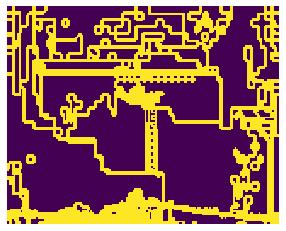

In [69]:
plt.axis("off")
plt.imshow(c)
print(c.shape)

In [70]:
# 9 orientations
b=np.zeros((64,80))
for i in range(0,64):
    for j in range(0,80):
        b[i,j]=max(fd[i,j,0,0,:])
        

(64, 80)


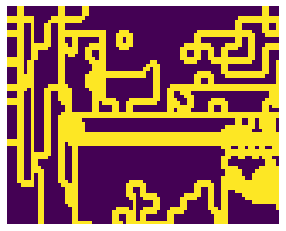

In [71]:
plt.axis("off")
plt.imshow(b)
print(b.shape)

In [72]:
hog_image.shape

(512, 640)

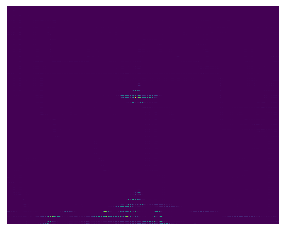

In [73]:
plt.axis("off")
plt.imshow(hog_image)

In [74]:
image = cv2.resize(hog_image, (64, 80), interpolation=cv2.INTER_AREA)

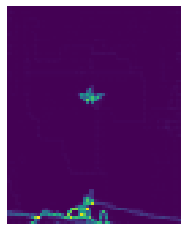

In [75]:
plt.axis("off")
plt.imshow(image)

In [92]:
input_path="/home/cs18s504/Downloads/drone"
os.chdir(input_path)
images=glob.glob("*.jpg")
Length=[]
Width=[]
for img in images:
    img=cv2.imread(img)
    #print(img.shape)
    width,length=img.shape[0:2]
    Length.append(length)
    Width.append(width)
W=int(sum(Width)/len(Width))
L=int(sum(Length)/len(Length))
print(W)
print(L)

512
640


(512, 640, 3)


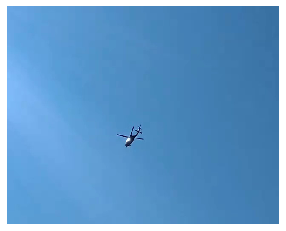

In [103]:
img = imread('/home/cs18s504/Downloads/drone_hog/00000001.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

In [95]:
path='/home/cs18s504/Downloads/drone'
count=0
for img in os.listdir(path):
    image=cv2.imread((os.path.join(path,img)))
    cv2.imwrite('/home/cs18s504/Downloads/drone1/'+str(count+1).zfill(8)+'.jpg', image)
    count=count+1

In [107]:
path='/home/cs18s504/Downloads/drone1'  # /home/data/mgk/drone/
count=0
for img in os.listdir(path):
    image=cv2.imread((os.path.join(path,img)))
    fd, hog_image = hog(image, orientations=1, pixels_per_cell=(4, 4),cells_per_block=(1, 1), visualize=True, multichannel=True, feature_vector=False)
    im_new=np.zeros((512,640,4))
    im_new[:,:,0:3]=image
    im_new[:,:,3]=hog_image
    print(im_new.shape)
    #cv2.imwrite('/home/cs18s504/Downloads/drone_hog/'+str(count+1).zfill(8)+'.png', im_new)
    np.save('/home/cs18s504/Downloads/drone_hog/'+str(count+1)+'.npy', im_new)
    count=count+1

(512, 640, 4)
(512, 640, 4)
(512, 640, 4)
(512, 640, 4)
(512, 640, 4)


In [110]:
n=np.load("/home/cs18s504/Downloads/drone_hog/1.npy")
torch.from_numpy(n)

tensor([[[227., 166., 104.,   0.],
         [227., 166., 104.,   0.],
         [227., 166., 104.,   0.],
         ...,
         [162., 113.,  57.,   0.],
         [162., 113.,  57.,   0.],
         [162., 113.,  57.,   0.]],

        [[227., 166., 104.,   0.],
         [227., 166., 104.,   0.],
         [227., 166., 104.,   0.],
         ...,
         [162., 113.,  57.,   0.],
         [162., 113.,  57.,   0.],
         [162., 113.,  57.,   0.]],

        [[227., 166., 104.,   0.],
         [227., 166., 104.,   0.],
         [227., 166., 104.,   0.],
         ...,
         [162., 113.,  57.,   0.],
         [162., 113.,  57.,   0.],
         [162., 113.,  57.,   0.]],

        ...,

        [[215., 160.,  91.,   0.],
         [215., 160.,  91.,   0.],
         [215., 160.,  91.,   0.],
         ...,
         [173., 123.,  65.,   0.],
         [173., 123.,  65.,   0.],
         [173., 123.,  65.,   0.]],

        [[215., 160.,  91.,   0.],
         [215., 160.,  91.,   0.],
         [21